PROJECT TO SHOW DATA FROM MY THINKSPEAK GRAPHS

In [7]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
r = f"https://api.thingspeak.com/channels/2338840/feeds.json?results=3000"
        
response = requests.get(r)
data = response.json()

df = pd.DataFrame(data['feeds'])

print(df)

                created_at  entry_id    field1 field2
0     2025-02-15T12:23:49Z    430828  22.70000  14.09
1     2025-02-15T12:24:51Z    430829  22.70000  14.09
2     2025-02-15T12:25:52Z    430830  22.70000  14.09
3     2025-02-15T12:26:54Z    430831  22.70000  14.09
4     2025-02-15T12:27:56Z    430832  22.70000  14.09
...                    ...       ...       ...    ...
2995  2025-02-19T13:45:53Z    433823  23.00000   6.93
2996  2025-02-19T13:46:55Z    433824  23.00000   6.93
2997  2025-02-19T13:47:56Z    433825  23.10000   6.93
2998  2025-02-19T13:48:59Z    433826  23.10000   6.93
2999  2025-02-19T15:11:24Z    433827       nan   8.93

[3000 rows x 4 columns]


FILTER DATA WITHOUTH VALUES

In [26]:
def eliminar_filas_cero(df, field1, field2):
    return df[(df[field1].notna()) & (df[field2].notna())]
df = eliminar_filas_cero(df, "field1", "field2")
df = df.loc[df['field2'] != 0]
# Ejemplo de uso
df["field1"] = pd.to_numeric(df["field1"], errors='coerce')
df["field2"] = pd.to_numeric(df["field2"], errors='coerce')


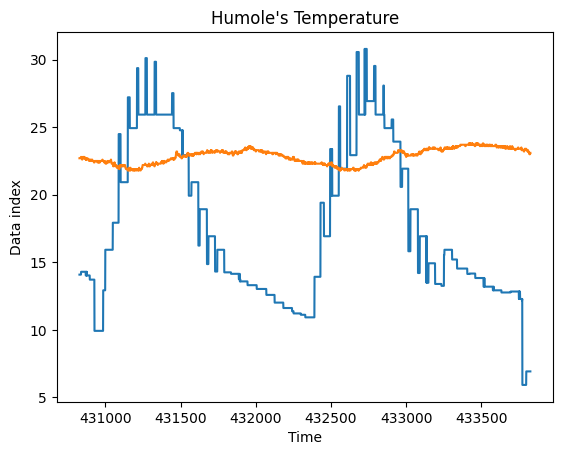

In [27]:

pedro = df["field2"].mean()
juan = df["field1"].mean()

plt.plot(df["entry_id"], df["field2"])
plt.plot(df["entry_id"], df["field1"])
plt.title("Humole's Temperature")
plt.xlabel("Time")
plt.ylabel("Data index")
plt.show()

(array([ 77., 171.,   0.,  58.,  87.,   0., 158., 233., 126.,   0., 167.,
          0.,  90., 118.,   0., 108., 126.,   0., 156., 271.,   0., 215.,
        171., 224.,   0., 129.,   0., 146., 142.,  26.]),
 array([21.8       , 21.86666667, 21.93333333, 22.        , 22.06666667,
        22.13333333, 22.2       , 22.26666667, 22.33333333, 22.4       ,
        22.46666667, 22.53333333, 22.6       , 22.66666667, 22.73333333,
        22.8       , 22.86666667, 22.93333333, 23.        , 23.06666667,
        23.13333333, 23.2       , 23.26666667, 23.33333333, 23.4       ,
        23.46666667, 23.53333333, 23.6       , 23.66666667, 23.73333333,
        23.8       ]),
 <BarContainer object of 30 artists>)

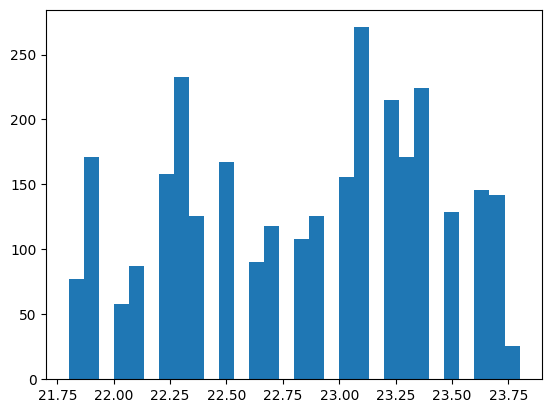

In [ ]:
pepe = np.array(df["field1"])
plt.hist(pepe, bins=30)
